In [0]:
%tensorflow_version 1.x

In [0]:
### In google Colab -- just once: ###
# load into Files:
  # neural.zip
  # data.zip
### run: ###
# !unzip data.zip
# !pip install livelossplot

In [3]:
!unzip -o neural.zip

Archive:  neural.zip
  inflating: neural/architectures.py  
  inflating: neural/core/helpers.py  
  inflating: neural/core/training.py  
 extracting: neural/core/__init__.py  
 extracting: neural/__init__.py      


In [4]:
import pandas as pd
import numpy as np

import helpers_models as hm
import helpers_strings as hs

from neural.architectures import build_gru, build_bigru
from neural.core.training import full_nn
from neural.core.helpers import submission

Using TensorFlow backend.


In [0]:
RUN_SANITY = False
NEW_RANDOM_SPLIT = True

In [6]:
if NEW_RANDOM_SPLIT:
  semilla = np.random.randint(1,9999)
else:
  semilla = 800
rng = np.random.RandomState(semilla)
print(semilla)

775


In [0]:
datos_raw = hm.read_tagged_data()
datos = hm.clean_tagged_data(datos_raw)
X = datos['text']
y = datos['target']
X_train, X_val, y_train, y_val = hm.split_data(X, y, 0.2, rng)

In [0]:
### GRU sanity check ###
if RUN_SANITY:
  param_tokenizer = dict(
                      vocab_size=None
                      ,pad_type='pre'
                      ,seq_maxlen=100
                      )
  param_nn = dict(
                        optimizer='adam'
                        ,learn_rate=1e-4
                        ,l2_strength=0.01
                        ,decay_strength=0.0
                        ,momentum=None          
                        ,embedding_dim=512
                        ,initializer='he_uniform'  
                  )
  param_train = dict(
                        epochs=5
                        ,batch_size=16
                        ,early_stopping_n=999999
                        ,decay_factor=0.0
                        ,decay_patience_n=999999
                        ,sanity_check_n=20
                        ,verbose=2
                    )
  param_sanity = dict(**param_tokenizer, **param_nn, **param_train)
  mod_check = full_nn(
                build_gru, X_train, y_train, X_val, y_val, **param_sanity
                ) 

In [0]:
# NN parameters
param_tokenizer = dict(
                      vocab_size=None
                      ,pad_type='pre'
                      ,seq_maxlen=100
                      )
param_nn = dict(
                      optimizer='adam'
                      ,learn_rate=1e-5
                      ,l2_strength=0.01
                      ,decay_strength=0.0
                      ,momentum=None          
                      ,embedding_dim=512
                      ,initializer='he_uniform'
                )
param_train = dict(
                      epochs=30
                      ,batch_size=16
                      ,early_stopping_n=10
                      ,decay_factor=0.9
                      ,decay_patience_n=5
                      ,sanity_check_n=None
                      ,verbose=2
                  )
param = dict(**param_tokenizer, **param_nn, **param_train)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6002 samples, validate on 1501 samples
Epoch 1/30





 - 8s - loss: 37.2131 - acc: 0.6160 - val_loss: 35.3684 - val_acc: 0.5923

Epoch 00001: val_acc improved from -inf to 0.59227, saving model to best_model.hdf5
- val_f1: 0.2010 - val_rec: 0.1149 - val_prec: 0.8021 
Epoch 2/30
 - 5s - loss: 33.6494 - acc: 0.5953 - val_loss: 31.9676 - val_acc: 0.5576

Epoch 00002: val_acc did not improve from 0.59227
- val_f1: 0.0178 - val_rec: 0.0090 - val_prec: 1.0000 
Epoch 3/30
 - 5s - loss: 30.3919 - acc: 0.6060 - val_loss: 28.8628 - val_acc: 0.6229

Epoch 00003: val_acc improved from 0.59227 to 0.62292, saving model to best_model.hdf5
- val_f1: 0.3081 - val_rec: 0.1881 - val_prec: 0.8514 
Epoch 4/30
 - 5s - loss: 27.4192 - acc: 0.6816 - val_loss: 26.0285 - val_acc: 0.6736

Epoch 00004: val_acc improved from 0.62292 to 0.67355, saving model to best_model.hdf5
- val_f1: 0.4651 - val_rec: 

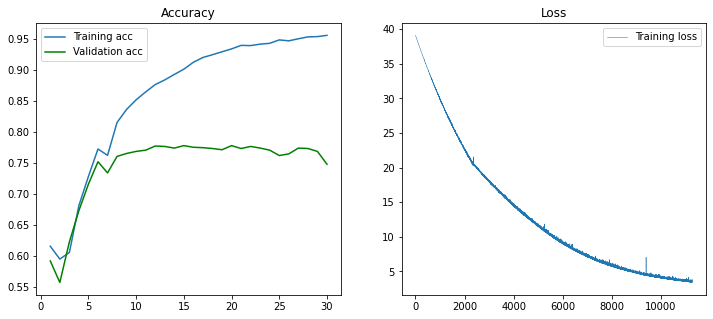

In [10]:
# Training NN GRU
mod, mod_tokenizer = full_nn(build_gru, X_train, y_train, X_val, y_val, **param) 

Train on 6002 samples, validate on 1501 samples
Epoch 1/30
 - 19s - loss: 123.4502 - acc: 0.5701 - val_loss: 115.8986 - val_acc: 0.5536

Epoch 00001: val_acc improved from -inf to 0.55363, saving model to best_model.hdf5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- val_f1: 0.0000 - val_rec: 0.0000 - val_prec: 0.0000 
Epoch 2/30
 - 18s - loss: 108.9777 - acc: 0.6085 - val_loss: 102.2622 - val_acc: 0.6516

Epoch 00002: val_acc improved from 0.55363 to 0.65157, saving model to best_model.hdf5
- val_f1: 0.4221 - val_rec: 0.2851 - val_prec: 0.8128 
Epoch 3/30
 - 18s - loss: 96.0751 - acc: 0.7179 - val_loss: 90.0857 - val_acc: 0.7308

Epoch 00003: val_acc improved from 0.65157 to 0.73085, saving model to best_model.hdf5
- val_f1: 0.6224 - val_rec: 0.4970 - val_prec: 0.8325 
Epoch 4/30
 - 18s - loss: 84.6167 - acc: 0.7744 - val_loss: 79.4181 - val_acc: 0.7682

Epoch 00004: val_acc improved from 0.73085 to 0.76815, saving model to best_model.hdf5
- val_f1: 0.7119 - val_rec: 0.6418 - val_prec: 0.7993 
Epoch 5/30
 - 18s - loss: 74.5823 - acc: 0.8191 - val_loss: 70.0396 - val_acc: 0.7795

Epoch 00005: val_acc improved from 0.76815 to 0.77948, saving model to best_model.hdf5
- val_f1: 0.7230 - val_rec: 0.6448 - val_prec: 0.8229 
Epoch 6/30
 - 18s - loss: 6

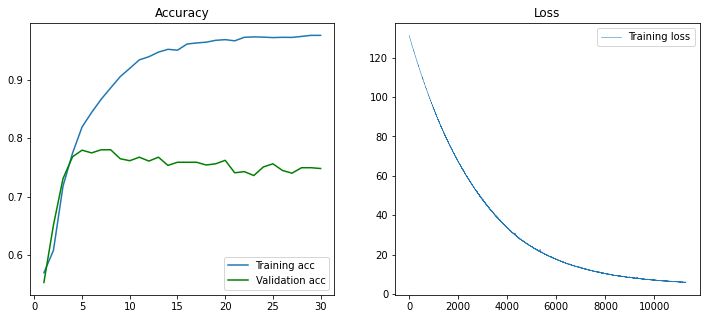

In [17]:
# Training NN BIGRU
mod, mod_tokenizer = full_nn(build_bigru, X_train, y_train, X_val, y_val, **param) 

In [0]:
# Agregar RandonSearch (o bayesian para los aventureros)

In [0]:
# Predict and generate submission of TEST
submission(mod_name='best_model.hdf5', output='submission_func.csv', tokenizer=mod_tokenizer, param_tokenizer=param_tokenizer)